<table>
    <tr>
        <td>
        <center>
        <font size="+1">If you haven't used BigQuery datasets on Kaggle previously, check out the <a href = "https://www.kaggle.com/rtatman/sql-scavenger-hunt-handbook/">Scavenger Hunt Handbook</a> kernel to get started.</font>
        </center>
        </td>
    </tr>
</table>

# SELECT, FROM & WHERE

Today, we're going to learn how to use SELECT, FROM and WHERE to get data from a specific column based on the value of another column. For the purposes of this explanation, we'll be using this imaginary database, `pet_records` which has just one table in it, called `pets`, which looks like this:

![](https://i.imgur.com/Ef4Puo3.png)

### SELECT ... FROM
___

The most basic SQL query is to select a single column from a specific table. To do this, you need to tell SELECT which column to select and then specify what table that column is from using from. 

> **Do you need to capitalize SELECT and FROM?** No, SQL doesn't care about capitalization. However, it's customary to capitalize your SQL commands and it makes your queries a bit easier to read.

So, if we wanted to select the "Name" column from the pets table of the pet_records database (if that database were accessible as a BigQuery dataset on Kaggle , which it is not, because I made it up), we would do this:

    SELECT Name
    FROM `bigquery-public-data.pet_records.pets`

Which would return the highlighted data from this figure.

![](https://i.imgur.com/8FdVyFP.png)

### WHERE ...
___

When you're working with BigQuery datasets, you're almost always going to want to return only certain rows, usually based on the value of a different column. You can do this using the WHERE clause, which will only return the rows where the WHERE clause evaluates to true.

Let's look at an example:

    SELECT Name
    FROM `bigquery-public-data.pet_records.pets`
    WHERE Animal = "Cat"

This query will only return the entries from the "Name" column that are in rows where the "Animal" column has the text "Cat" in it. Those are the cells highlighted in blue in this figure:

![](https://i.imgur.com/Va52Qdl.png)


## Example: What are all the U.S. cities in the OpenAQ dataset?
___

Now that you've got the basics down, let's work through an example with a real dataset. Today we're going to be working with the OpenAQ dataset, which has information on air quality around the world. (The data in it should be current: it's updated weekly.)

To help get you situated, I'm going to run through a complete query first. Then it will be your turn to get started running your queries!

First, I'm going to set up everything we need to run queries and take a quick peek at what tables are in our database.

In [1]:
# import package with helper functions 
import bq_helper

# create a helper object for this dataset
open_aq = bq_helper.BigQueryHelper(active_project="bigquery-public-data",
                                   dataset_name="openaq")

# print all the tables in this dataset (there's only one!)
open_aq.list_tables()

['global_air_quality']

I'm going to take a peek at the first couple of rows to help me see what sort of data is in this dataset.

In [2]:
# print the first couple rows of the "global_air_quality" dataset
open_aq.head("global_air_quality")

,location,city,country,pollutant,value,timestamp,unit,source_name,latitude,longitude,averaged_over_in_hours
0,Mobile_Cle Elum,037,US,pm25,0.00,2017-09-26 20:00:00+00:00,µg/m³,AirNow,47.197630,-120.958230,1.0
1,Mobile_WhiteSalmon,039,US,pm25,0.00,2017-09-26 20:00:00+00:00,µg/m³,AirNow,45.732414,-121.492330,1.0
2,Mobile_Newport,051,US,pm25,0.00,2017-09-21 18:00:00+00:00,µg/m³,AirNow,48.186485,-117.049160,1.0
3,FR20047,Ain,FR,o3,37.90,2018-02-12 21:00:00+00:00,µg/m³,EEA France,45.823223,4.953958,1.0
4,FR20047,Ain,FR,pm10,12.38,2018-02-12 22:00:00+00:00,µg/m³,EEA France,45.823223,4.953958,1.0


Great, everything looks good! Now that I'm set up, I'm going to put together a query. I want to select all the values from the "city" column for the rows there the "country" column is "us" (for "United States"). 

> **What's up with the triple quotation marks (""")?** These tell Python that everything inside them is a single string, even though we have line breaks in it. The line breaks aren't necessary, but they do make it much easier to read your query.

In [3]:
# query to select all the items from the "city" column where the
# "country" column is "us"
query = """SELECT city
            FROM `bigquery-public-data.openaq.global_air_quality`
            WHERE country = 'US'
        """

> **Important:**  Note that the argument we pass to FROM is *not* in single or double quotation marks (' or "). It is in backticks (\`). If you use quotation marks instead of backticks, you'll get this error when you try to run the query: `Syntax error: Unexpected string literal` 

Now I can use this query to get information from our open_aq dataset. I'm using the `BigQueryHelper.query_to_pandas_safe()` method here because it won't run a query if it's larger than 1 gigabyte, which helps me avoid accidentally running a very large query. See the [Scavenger Hunt Handbook ](https://www.kaggle.com/rtatman/sql-scavenger-hunt-handbook/)for more details. 

In [4]:
# the query_to_pandas_safe will only return a result if it's less
# than one gigabyte (by default)
us_cities = open_aq.query_to_pandas_safe(query)

Now I've got a dataframe called us_cities, which I can use like I would any other dataframe:

In [5]:
# What five cities have the most measurements taken there?
us_cities.city.value_counts().head()

Phoenix-Mesa-Scottsdale                     85
Houston                                     81
Los Angeles-Long Beach-Santa Ana            60
New York-Northern New Jersey-Long Island    57
Riverside-San Bernardino-Ontario            56
Name: city, dtype: int64

# Scavenger hunt
___

Now it's your turn! Here's the questions I would like you to get the data to answer:

* Which countries use a unit other than ppm to measure any type of pollution? (Hint: to get rows where the value *isn't* something, use "!=")
* Which pollutants have a value of exactly 0?

In order to answer these questions, you can fork this notebook by hitting the blue "Fork Notebook" at the very top of this page (you may have to scroll up).  "Forking" something is making a copy of it that you can edit on your own without changing the original.

### Q1. Which countries use a unit other than ppm to measure any type of pollution?

In [7]:
# Your code goes here :)
# Countries using a unit other than ppm to measure any type of pollution

# check all the pollutant types using pm standard
query = """
        SELECT DISTINCT pollutant
        FROM `bigquery-public-data.openaq.global_air_quality`;
"""
unique_pollutant_types = open_aq.query_to_pandas_safe(query)
unique_pollutant_types

,pollutant
0,pm25
1,o3
2,pm10
3,no2
4,so2
5,co
6,bc


In [25]:
# Since each country can use multiple units for air quality, 
# we query using DISTINCT.
query = """
        SELECT DISTINCT country
        FROM `bigquery-public-data.openaq.global_air_quality`
        WHERE pollutant != 'pm25' OR pollutant != 'pm10';
"""

# estimate query size
open_aq.estimate_query_size(query)

0.00014383532106876373

In [26]:
# run the query and get the result as pandas dataframe
countries_using_other_unit = open_aq.query_to_pandas_safe(query)

,country
0,US
1,FR
2,TH
3,CL
4,IN
5,NL
6,GB
7,CH
8,PT
9,ES


In [27]:
# Store the related information into dataframe and do some more analysis.
query = """
        SELECT country, pollutant
        FROM `bigquery-public-data.openaq.global_air_quality`;
"""

# estimate query size
open_aq.estimate_query_size(query)

0.00014383532106876373

In [28]:
country_pollutant = open_aq.query_to_pandas_safe(query)
country_pollutant.head()

,country,pollutant
0,AD,co
1,AD,o3
2,AD,o3
3,AD,o3
4,AD,no2


In [87]:
# total countries in dataset
print(len(country_pollutant.country.unique()))
country_pollutant.country.unique()

64


array(['AD', 'AE', 'AR', 'AT', 'AU', 'BA', 'BD', 'BE', 'BH', 'BR', 'CA',
       'CH', 'CL', 'CN', 'CO', 'CZ', 'DE', 'DK', 'ES', 'ET', 'FI', 'FR',
       'GB', 'GH', 'GI', 'HK', 'HR', 'HU', 'ID', 'IE', 'IL', 'IN', 'IT',
       'KW', 'LK', 'LT', 'LU', 'LV', 'MK', 'MN', 'MT', 'MX', 'NG', 'NL',
       'NO', 'NP', 'PE', 'PH', 'PL', 'PT', 'RS', 'RU', 'SE', 'SG', 'SI',
       'SK', 'TH', 'TR', 'TW', 'UG', 'US', 'VN', 'XK', 'ZA'], dtype=object)

In [31]:
# total types of pollutant in dataset
country_pollutant.pollutant.unique()

array(['co', 'o3', 'no2', 'so2', 'pm10', 'pm25', 'bc'], dtype=object)

In [33]:
# drop the duplicates except for the first occurred row
country_pollutant_nodup = country_pollutant.drop_duplicates()
country_pollutant_nodup.head(10)

,country,pollutant
0,AD,co
1,AD,o3
4,AD,no2
5,AD,so2
6,AD,pm10
7,AE,o3
8,AE,pm25
9,AR,co
12,AR,no2
15,AR,pm10


In [34]:
country_pollutant_nodup[country_pollutant_nodup.country=='AD']

,country,pollutant
0,AD,co
1,AD,o3
4,AD,no2
5,AD,so2
6,AD,pm10


In [36]:
country_pollutant_nodup[country_pollutant_nodup.country=='AR']

,country,pollutant
9,AR,co
12,AR,no2
15,AR,pm10
18,AR,pm25


In [72]:
# create new dataframe to represent new information 
import pandas as pd

num_of_pollutant_types = country_pollutant_nodup.groupby('country').pollutant.count()
types_of_pollutant_types = country_pollutant_nodup.groupby('country').pollutant.apply(lambda x: '/'.join(x))


num_of_pollutant_types = num_of_pollutant_types.rename('pollutant_nums')
types_of_pollutant_types = types_of_pollutant_types.rename('pollutant_names')

pollutant_details_by_country = pd.concat([num_of_pollutant_types, types_of_pollutant_types], axis=1).reset_index()
pollutant_details_by_country.head()

,country,pollutant_nums,pollutant_names
0,AD,5,co/o3/no2/so2/pm10
1,AE,2,o3/pm25
2,AR,4,co/no2/pm10/pm25
3,AT,5,co/o3/no2/so2/pm10
4,AU,6,co/o3/no2/so2/pm10/pm25


In [84]:
import re

In [85]:
# create new column indicating whether the country has used 'pm' type unit or not
pollutant_details_by_country['has_used_pm'] = pollutant_details_by_country['pollutant_names'].apply(
                                                    lambda x: 1 if re.findall('pm[0-9]+', x) else 0)
pollutant_details_by_country.head()

,country,pollutant_nums,pollutant_names,has_used_pm
0,AD,5,co/o3/no2/so2/pm10,1
1,AE,2,o3/pm25,1
2,AR,4,co/no2/pm10/pm25,1
3,AT,5,co/o3/no2/so2/pm10,1
4,AU,6,co/o3/no2/so2/pm10/pm25,1


In [89]:
# countries which has not used pm types
# only 3 countries out of 64 countries in dataset have not used pm types.
pollutant_details_by_country[pollutant_details_by_country.has_used_pm == 0].country

17    DK
24    GI
37    LV
Name: country, dtype: object

### Q2. Which pollutants have a value of exactly 0?

In [92]:
query = """
        SELECT DISTINCT pollutant, value
        FROM `bigquery-public-data.openaq.global_air_quality`
        WHERE value = 0.0
"""

zero_pollutants = open_aq.query_to_pandas_safe(query)

In [93]:
# all kinds of pollutants has been recorded as 0.0 at least one time.
zero_pollutants

,pollutant,value
0,co,0.0
1,no2,0.0
2,so2,0.0
3,pm25,0.0
4,pm10,0.0
5,bc,0.0
6,o3,0.0


In [116]:
# gather some more information that we're interested with.
query = """
        SELECT country, city, pollutant, value, timestamp, latitude, longitude
        FROM `bigquery-public-data.openaq.global_air_quality`
        WHERE value = 0.0
"""

zero_pollutant_info = open_aq.query_to_pandas_safe(query)
zero_pollutant_info.head()

,country,city,pollutant,value,timestamp,latitude,longitude
0,PE,Lima,so2,0.0,2017-07-20 06:00:00+00:00,-12.026111,-76.918610
1,PE,Lima,so2,0.0,2017-07-20 06:00:00+00:00,-12.108628,-77.007770
2,MT,Msida,co,0.0,2018-01-31 13:00:00+00:00,35.895836,14.489986
3,NO,Bergen,pm10,0.0,2018-01-04 12:00:00+00:00,60.392130,5.328050
4,RU,Moscow,co,0.0,2017-09-11 08:00:00+00:00,55.803337,37.524990


In [111]:
# US is the country with the largest records of zero-pollution
# Does it say that US is the city with the cleanest air in the world?
zero_pollutant_info.groupby('country').value.count().sort_values(ascending=False).head()

country
US    272
CL    170
AT     70
LT     65
FR     55
Name: value, dtype: int64

In [112]:
# If we the group extracted dataframe by city,
# the result seems more trustable in terms of 'the cleanest air'
zero_pollutant_info.groupby('city').value.count().sort_values(ascending=False).head()

city
Kaunas                                      19
New York-Northern New Jersey-Long Island    15
Vilnius                                     15
Amt der Steierm�rkischen Landesregierung    12
Danish Air Quality Monitoring Programme     12
Name: value, dtype: int64

In [117]:
# now let's discover US in detail.

zero_pollutant_info_US = zero_pollutant_info[zero_pollutant_info.country == 'US']
zero_pollutant_info_US.head()

,country,city,pollutant,value,timestamp,latitude,longitude
144,US,037,pm25,0.0,2017-09-26 20:00:00+00:00,47.197630,-120.95823
145,US,039,pm25,0.0,2017-09-26 20:00:00+00:00,45.732414,-121.49233
146,US,051,pm25,0.0,2017-09-21 18:00:00+00:00,48.186485,-117.04916
147,US,MT1,pm25,0.0,2017-10-13 18:00:00+00:00,48.607407,-112.36384
148,US,GILA,so2,0.0,2017-12-18 14:00:00+00:00,33.397434,-110.87445


In [115]:
zero_pollutant_info_US.city.value_counts().head()

New York-Northern New Jersey-Long Island    15
Washington-Arlington-Alexandria              8
Los Angeles-Long Beach-Santa Ana             6
Atlanta-Sandy Springs-Marietta               6
Bridgeport-Stamford-Norwalk                  4
Name: city, dtype: int64

In [121]:
# Top 5 US cities with the cleanest air.
top5_cleanest_cities_US = zero_pollutant_info_US.city.value_counts().head().index.tolist()
top5_cleanest_cities_US

['New York-Northern New Jersey-Long Island',
 'Washington-Arlington-Alexandria',
 'Los Angeles-Long Beach-Santa Ana',
 'Atlanta-Sandy Springs-Marietta',
 'Bridgeport-Stamford-Norwalk']

In [131]:
top5_cleanest_cities_US[0]

'New York-Northern New Jersey-Long Island'

In [133]:
zero_pollutant_info_US_top5 = zero_pollutant_info_US[(zero_pollutant_info_US.city == top5_cleanest_cities_US[0])
                                                             | (zero_pollutant_info_US.city == top5_cleanest_cities_US[1])
                                                             | (zero_pollutant_info_US.city == top5_cleanest_cities_US[2])
                                                             | (zero_pollutant_info_US.city == top5_cleanest_cities_US[3])
                                                             | (zero_pollutant_info_US.city == top5_cleanest_cities_US[4])
                                                         ]

In [135]:
zero_pollutant_info_US_top5

,country,city,pollutant,value,timestamp,latitude,longitude
187,US,Atlanta-Sandy Springs-Marietta,o3,0.0,2017-11-01 11:00:00+00:00,33.403900,-84.746100
188,US,Atlanta-Sandy Springs-Marietta,o3,0.0,2017-11-01 11:00:00+00:00,33.743300,-84.778900
191,US,Washington-Arlington-Alexandria,so2,0.0,2017-05-26 04:00:00+00:00,39.028400,-76.817200
192,US,Los Angeles-Long Beach-Santa Ana,co,0.0,2017-12-07 16:00:00+00:00,33.629990,-117.675870
193,US,Los Angeles-Long Beach-Santa Ana,so2,0.0,2017-07-01 18:00:00+00:00,33.674540,-117.925590
197,US,New York-Northern New Jersey-Long Island,co,0.0,2016-07-24 07:00:00+00:00,40.757500,-74.200500
198,US,New York-Northern New Jersey-Long Island,no2,0.0,2018-02-09 13:00:00+00:00,40.853550,-73.966100
227,US,Atlanta-Sandy Springs-Marietta,o3,0.0,2017-11-03 09:00:00+00:00,34.014400,-84.607500
330,US,Washington-Arlington-Alexandria,o3,0.0,2017-11-15 10:00:00+00:00,39.024400,-77.490000
331,US,Washington-Arlington-Alexandria,o3,0.0,2017-11-15 10:00:00+00:00,38.859400,-77.058900


In [168]:
# check how the dataframe above without duplicates
zero_pollutant_info_US_top5.drop_duplicates(subset='city')

,country,city,pollutant,value,timestamp,latitude,longitude
187,US,Atlanta-Sandy Springs-Marietta,o3,0.0,2017-11-01 11:00:00+00:00,33.40390,-84.74610
191,US,Washington-Arlington-Alexandria,so2,0.0,2017-05-26 04:00:00+00:00,39.02840,-76.81720
192,US,Los Angeles-Long Beach-Santa Ana,co,0.0,2017-12-07 16:00:00+00:00,33.62999,-117.67587
197,US,New York-Northern New Jersey-Long Island,co,0.0,2016-07-24 07:00:00+00:00,40.75750,-74.20050
683,US,Bridgeport-Stamford-Norwalk,o3,0.0,2018-02-11 11:00:00+00:00,41.40140,-73.44470


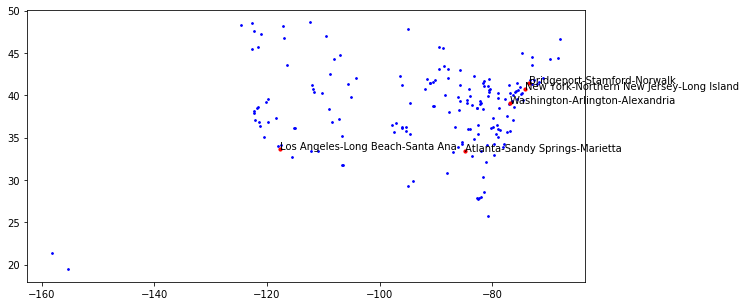

In [176]:
from matplotlib import pyplot as plt
%matplotlib inline

# Is there any geometric similarity among those 5 cities?
# we can check roughly using 2D simple graph.

fig, ax = plt.subplots(figsize=(10, 5))

ax.scatter(zero_pollutant_info_US.drop_duplicates(subset='city').longitude, 
            zero_pollutant_info_US.drop_duplicates(subset='city').latitude, 
            c='blue', s=3)

ax.scatter(zero_pollutant_info_US_top5.drop_duplicates(subset='city').longitude,
           zero_pollutant_info_US_top5.drop_duplicates(subset='city').latitude,
           c='red', s=10)

for i, city in enumerate(zero_pollutant_info_US_top5.drop_duplicates(subset='city').city.tolist()):
    ax.annotate(city,
               (zero_pollutant_info_US_top5.drop_duplicates(subset='city').longitude.tolist()[i],
               zero_pollutant_info_US_top5.drop_duplicates(subset='city').latitude.tolist()[i]
               )
               )

plt.show()

In [ ]:
# Except for Los-Angeles and Atlanta, 
# there seems little relationship among top5 cities with clean air in US.
# As we checked the dataframe except duplicates, there seems little relationship among them
# in aspect with period / time.

In [169]:
# For further step, we will check the changes of air pollution by time in Los Angeles.

query = """
        SELECT pollutant, value, timestamp
        FROM `bigquery-public-data.openaq.global_air_quality`
        WHERE country = 'US' AND city = 'Los Angeles-Long Beach-Santa Ana';
"""

air_pollution_la = open_aq.query_to_pandas_safe(query)
air_pollution_la.head()

,pollutant,value,timestamp
0,co,0.030,2017-07-01 18:00:00+00:00
1,o3,0.049,2017-07-01 18:00:00+00:00
2,no2,0.002,2017-07-01 18:00:00+00:00
3,so2,0.000,2017-07-01 18:00:00+00:00
4,co,0.000,2017-12-07 16:00:00+00:00


In [174]:
air_pollution_la['timestamp'].dtype

datetime64[ns, UTC]

In [175]:
air_pollution_la.sort_values(by='timestamp')

,pollutant,value,timestamp
0,co,0.030,2017-07-01 18:00:00+00:00
1,o3,0.049,2017-07-01 18:00:00+00:00
2,no2,0.002,2017-07-01 18:00:00+00:00
3,so2,0.000,2017-07-01 18:00:00+00:00
4,co,0.000,2017-12-07 16:00:00+00:00
57,co,0.320,2018-02-10 21:00:00+00:00
58,o3,0.042,2018-02-10 21:00:00+00:00
59,no2,0.011,2018-02-10 21:00:00+00:00
8,co,0.490,2018-02-11 11:00:00+00:00
36,no2,0.016,2018-02-11 11:00:00+00:00


In [ ]:
# In the given dataset, we can see the air pollution data from 2017-07 to 2018-02
# It is quite difficult to visualize the flowchart of air pollution in LA - 
# since it has different types of air pollution observation and they have not been used consistently.
# And - most of the observation for air pollution range over 2018-02 period at slightly different spots in LA.

# To graph the air pollution flowchart, we need some domain-related knowledge 
# regarding air pollution metrics and etc.

# SQL Scavenger Hunt: Day 1 notebook closing.